FEMNIST 데이터를 클라이언트별로 분할해서 클라이언트 별 DataLoader 생성

In [147]:
import json
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

# FEMNIST 데이터셋 정의
class FEMNISTDataset(Dataset):
    def __init__(self, data_path):
        self.data = []
        self.labels = []
        
        with open(data_path, 'r') as f:
            raw_data = json.load(f)
        for user_data in raw_data['user_data'].values():
            self.data.extend(user_data['x'])
            self.labels.extend(user_data['y'])  
            
        self.transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image = np.array(self.data[idx], dtype=np.float32).reshape(28, 28)
        label = self.data[idx]
        image = self.transform(image)
        return image, label
    

# 클라이언트별 데이터 경로
client_data_paths = [
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_0_niid_05_keep_5_train_9.json',
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_1_niid_05_keep_5_train_9.json',
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_2_niid_05_keep_5_train_9.json',
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_3_niid_05_keep_5_train_9.json',
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_4_niid_05_keep_5_train_9.json',
]

# 클라이언트별 DataLoader 생성
client_loaders = [DataLoader(FEMNISTDataset(path), batch_size=32, shuffle=True) for path in client_data_paths]


SyntaxError: unmatched ')' (2852807318.py, line 28)

In [124]:
import json
from collections import Counter
import matplotlib.pyplot as plt

def analyze_client_data(data_path):
    with open(data_path, 'r') as f:
        raw_data = json.load(f)
    
    # 사용자 리스트
    users = raw_data["users"]
    client_statistics = {}

    # 각 사용자 데이터 분석
    for user in users:
        labels = raw_data["user_data"][user]["y"]
        total_samples = len(labels)
        class_distribution = Counter(labels)
        client_statistics[user] = {
            "total_samples": total_samples,
            "class_distribution": class_distribution
        }

    return client_statistics

client_data_paths = [
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_0_niid_05_keep_5_train_9.json',
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_1_niid_05_keep_5_train_9.json',
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_2_niid_05_keep_5_train_9.json',
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_3_niid_05_keep_5_train_9.json',
    'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_4_niid_05_keep_5_train_9.json',
]

for i, path in enumerate(client_data_paths):
    print(f"Statistics for Client {i + 1}:")
    stats = analyze_client_data(path)
    for user, details in stats.items():
        print(f"  User: {user}")
        print(f"    Total Samples: {details['total_samples']}")
        print(f"    Class Distribution: {dict(details['class_distribution'])}")


Statistics for Client 1:
  User: f0023_08
    Total Samples: 377
    Class Distribution: {32: 4, 40: 27, 19: 3, 55: 19, 43: 7, 25: 6, 24: 26, 15: 7, 30: 9, 49: 13, 47: 24, 28: 18, 36: 13, 53: 17, 22: 8, 12: 7, 37: 3, 39: 7, 29: 12, 52: 1, 18: 7, 31: 3, 13: 1, 42: 3, 11: 2, 21: 2, 34: 2, 23: 3, 10: 1, 0: 11, 1: 11, 2: 11, 3: 10, 4: 11, 5: 10, 6: 12, 8: 9, 9: 11, 7: 7, 59: 1, 54: 1, 60: 1, 51: 1, 50: 1, 46: 1, 61: 1, 56: 1, 48: 1, 58: 1, 44: 1, 26: 1, 17: 1, 27: 1, 16: 1, 20: 1, 33: 1, 14: 1, 35: 1}
  User: f0009_06
    Total Samples: 340
    Class Distribution: {32: 4, 55: 20, 43: 7, 40: 5, 24: 22, 25: 4, 30: 10, 49: 15, 18: 4, 28: 17, 29: 7, 36: 6, 53: 13, 15: 7, 22: 7, 12: 12, 37: 4, 47: 9, 19: 2, 39: 10, 34: 3, 52: 2, 31: 3, 13: 2, 11: 2, 21: 3, 42: 2, 23: 3, 10: 2, 0: 13, 1: 12, 2: 11, 3: 10, 4: 10, 5: 12, 6: 13, 7: 12, 8: 10, 9: 10, 54: 1, 41: 1, 46: 1, 45: 1, 44: 1, 59: 1, 50: 1, 57: 1, 61: 1, 38: 1, 56: 1, 48: 1, 51: 1, 26: 1, 17: 1, 20: 1, 14: 1, 33: 1, 16: 1, 35: 1}
  User: f00

   Client    개수      비율
0       0   346   6.04%
1       1  4331  75.62%
2       2   350   6.11%
3       3   358   6.25%
4       4   342   5.97%


c:\Users\ahsld\anaconda3\envs\GGG\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ahsld\anaconda3\envs\GGG\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ahsld\anaconda3\envs\GGG\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\ahsld\anaconda3\envs\GGG\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


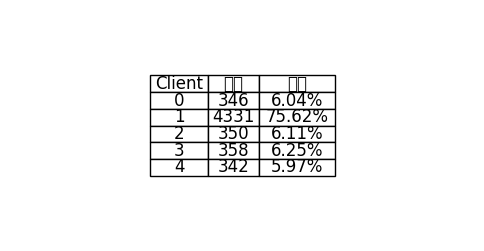

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

# 클라이언트별 데이터 통계 (예시 데이터)
client_ids = [0, 1, 2, 3, 4]
data_counts = [346, 4331, 350, 358, 342]  # 각 클라이언트의 데이터 개수
data_ratios = [f"{round(count / sum(data_counts) * 100, 2)}%" for count in data_counts]

# 데이터프레임 생성
data_statistics = pd.DataFrame({
    "Client": client_ids,
    "개수": data_counts,
    "비율": data_ratios
})

# 출력 및 시각화
print(data_statistics)

# 테이블 플롯
fig, ax = plt.subplots(figsize=(6, 3))
ax.axis('tight')
ax.axis('off')
table = ax.table(
    cellText=data_statistics.values,
    colLabels=data_statistics.columns,
    cellLoc="center",
    loc="center"
)
table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(data_statistics.columns))))
plt.show()


NON-IID로 데이터셋을 구성해서 클라이언트 1만  75.62% 

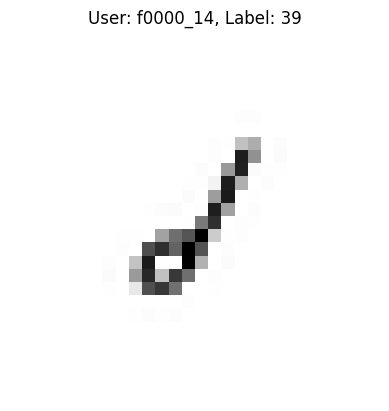

In [126]:
import json
import numpy as np
import matplotlib.pyplot as plt
import random

# JSON 데이터 로드
def load_femnist_data(data_path):
    with open(data_path, 'r') as f:
        data = json.load(f)
    return data

# 임의의 데이터 출력 함수
def display_random_sample(data_path):
    data = load_femnist_data(data_path)
    
    # 랜덤으로로 사용자 선택
    user = random.choice(list(data["user_data"].keys()))
    user_data = data["user_data"][user]
    
    # 랜덤덤 이미지와 라벨 선택
    idx = random.randint(0, len(user_data["x"]) - 1)
    image = np.array(user_data["x"][idx]).reshape(28, 28)
    label = user_data["y"][idx]
    
    # 이미지 출력
    plt.imshow(image, cmap='gray')
    plt.title(f"User: {user}, Label: {label}")
    plt.axis('off')
    plt.show()

# 데이터 경로
data_path = 'C:/Users/ahsld/leaf/data/femnist/data/train/all_data_0_niid_05_keep_5_train_9.json'

# 데이터 출력
display_random_sample(data_path)


학습 시작

In [127]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader

전역 모델(Grobal model) 초기화

In [139]:
# Simple CNN Model
def SimpleCNN():
    return nn.Sequential(
        nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2),
        nn.Flatten(),
        nn.Linear(64 * 7 * 7, 128),
        nn.ReLU(),
        nn.Linear(128, 62)
    )


In [143]:

# Federated SGD Implementation
def federated_sgd(global_model, client_loaders, num_rounds, client_fraction, lr):
    for round_num in range(num_rounds):
        print(f"\n=== Round {round_num + 1}/{num_rounds} - FedSGD ===")
        
        # 2. Client Sampling
        sampled_clients = np.random.choice(
            range(len(client_loaders)),
            int(client_fraction * len(client_loaders)),
            replace=False
        )
        print(f"Sampled Clients: {sampled_clients}")

        global_gradient = None

        # 3. Local Learning (Compute Gradients)
        for client_idx in sampled_clients:
            client_loader = client_loaders[client_idx]
            model = SimpleCNN()
            model.load_state_dict(global_model.state_dict())
            
            optimizer = torch.optim.SGD(model.parameters(), lr=lr)
            criterion = nn.CrossEntropyLoss()
            
            model.train()
            for batch in client_loader:
                images, labels = batch
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                break  # Only one mini-batch for FedSGD

            # Aggregate gradients
            if global_gradient is None:
                global_gradient = [param.grad.clone() for param in model.parameters()]
            else:
                for g, param in zip(global_gradient, model.parameters()):
                    g += param.grad

        # 4. Update Global Parameters
        for param, grad in zip(global_model.parameters(), global_gradient):
            param.data -= lr * (grad / len(sampled_clients))

In [144]:
# Federated Averaging Implementation
def federated_avg(global_model, client_loaders, num_rounds, client_fraction, num_epochs, lr):
    for round_num in range(num_rounds):
        print(f"\n=== Round {round_num + 1}/{num_rounds} - FedAvg ===")
        
        # 2. Client Sampling
        sampled_clients = np.random.choice(
            range(len(client_loaders)),
            int(client_fraction * len(client_loaders)),
            replace=False
        )
        print(f"Sampled Clients: {sampled_clients}")

        client_weights = []

        # 3. Local Learning (Compute Weights)
        for client_idx in sampled_clients:
            client_loader = client_loaders[client_idx]
            model = SimpleCNN()
            model.load_state_dict(global_model.state_dict())
            
            optimizer = torch.optim.SGD(model.parameters(), lr=lr)
            criterion = nn.CrossEntropyLoss()
            
            model.train()
            for _ in range(num_epochs):
                for batch in client_loader:
                    images, labels = batch
                    optimizer.zero_grad()
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

            client_weights.append({k: v.clone() for k, v in model.state_dict().items()})

        # 4. Update Global Parameters (Weighted Average)
        global_state_dict = global_model.state_dict()
        for key in global_state_dict.keys():
            global_state_dict[key] = sum([client[key] for client in client_weights]) / len(client_weights)
        global_model.load_state_dict(global_state_dict)


In [145]:
# Example Usage
if __name__ == "__main__":
    # Initialize global models for FedSGD and FedAvg
    SGD_Global = SimpleCNN()
    AVG_Global = SimpleCNN()

    # Placeholder for client loaders (replace with actual FEMNIST data)
    client_loaders = [
        DataLoader(torch.randn(100, 1, 28, 28), batch_size=32),
        DataLoader(torch.randn(100, 1, 28, 28), batch_size=32),
        DataLoader(torch.randn(100, 1, 28, 28), batch_size=32),
        DataLoader(torch.randn(100, 1, 28, 28), batch_size=32),
    ]

    # Federated SGD
    print("Starting Federated SGD")
    federated_sgd(SGD_Global, client_loaders, num_rounds=5, client_fraction=0.75, lr=0.01)

    # Federated Averaging
    print("\nStarting Federated Averaging")
    federated_avg(AVG_Global, client_loaders, num_rounds=5, client_fraction=0.75, num_epochs=2, lr=0.01)


Starting Federated SGD

=== Round 1/5 - FedSGD ===
Sampled Clients: [3 1 0]


ValueError: too many values to unpack (expected 2)